In [9]:
import numpy as np
from random import shuffle
from itertools import chain, combinations
from itertools import compress

In [2]:
def powerset(iterable):
    subset_list = list(chain.from_iterable(combinations(iterable, r)
                                          for r in range(1,len(iterable)+1)))
    return [list(i) for i in subset_list]

In [3]:
def find_factor(n):
    factor_values = []
    for i in range(1, n+1):
        if n % i == 0:
            factor_values.append(i)
    
    values = []
    for v in factor_values:
        values.append(v)
    return values[1:-1]

In [4]:
def divide_uniform(pop_item, position, axis_idx, n_div, is_factors = False):
    if is_factors:
        size_list = [(pop_item[axis_idx])//n_div] * n_div
    else:
        size_list = []
        for i in range(n_div-1):
            if i == 0:
                size_list.append((pop_item[axis_idx])//(n_div-i))
            else:
                size_list.append((pop_item[axis_idx] - size_list[-1]) // (n_div-i))
        size_list.append(pop_item[axis_idx] - np.sum(size_list))
    sizes, positions = [], []
    
    for i in range(n_div):
        item = pop_item.copy()
        item[axis_idx] = size_list[i]
        sizes.append(item)
        new_position = position.copy()
        
        if i != 0:
            new_position[axis_idx] += int(np.sum(size_list[:i]))
        positions.append(new_position)
    return sizes, positions

In [5]:
def divide_uniform_multi_axis(item_size, item_pos, axis_idx_list, 
                              n_div, is_factors = False):
    item_size = [item_size]
    item_pos = [item_pos]
    
    for axis_idx in axis_idx_list:
        n = len(item_size)
        sizes, positions = [], []
        
        for i in range(n):
            size = item_size.pop()
            pos = item_pos.pop()
            size, pos = divide_uniform(size, pos, axis_idx, n_div, is_factors)
            sizes += size
            positions += pos
        item_size = sizes.copy()
        item_pos = positions.copy()
    return sizes, positions

In [6]:
def generate_3dbox(case_size=[[20,20,20],[25,20,15]], min_s=3, is_prediv=0):
    case_input = []
    case_gt_upleft = []
    
    for c_l, c_b, c_h in case_size:
        N_mdd = 20 #np.random.choice(list(range(23, 28)), 1)
        X_input = [[c_l, c_b, c_h]]
        gt_upleft = [[0,0,0]]
        
        if is_prediv == 8: #8분할
            X_input, gt_upleft = divide_uniform_multi_axis(X_input.pop(),
                                                          gt_upleft.pop(),
                                                          [0,1,2], 2)
        elif is_prediv == 4: #4분할
            X_input, gt_upleft = divide_uniform_multi_axis(X_input.pop(),
                                                          gt_upleft.pop(),
                                                          [0,1], 2)
        elif is_prediv == 'h': #높이 분할
            X_input, gt_upleft = divide_uniform_multi_axis(X_input.pop(),
                                                          gt_upleft.pop(),
                                                          [2], 3)
            
        while len(X_input) < N_mdd:
            idx = np.random.choice(range(len(X_input)), 1)[0]
            pop_item = X_input.pop(idx) #[length, width, height]
            pop_gt_upleft = gt_upleft.pop(idx)
            axis_idx = np.random.choice([0,1,2],1)[0]
            
            factors = find_factor(pop_item[axis_idx])
            factors = list(compress(factors, 
                                   pop_item[axis_idx]/np.array(factors) >= 3))
            
            if pop_item[axis_idx] < min_s * 2 or len(factors) == 0:
                X_input.append(pop_item)
                gt_upleft.append(pop_gt_upleft)
            else:
                n_div = np.random.choice(factors, 1)[0]
                
                if False:
                    axis_idx_list = []
                    for i in range(3):
                        if pop_item[idx] == pop_item[i]:
                            axis_idx_list.append(i)
                    axis_idx_list = powerset(axis_idx_list)
                    axis_idx_list = list(compress(axis_idx_list, 
                                                  [idx in i for i in axis_idx_list]))
                    axis_idx_list = axis_idx_list[
                        np.random.choice(len(axis_idx_list), 1)[0]]
                axis_idx_list = [axis_idx]
                
                sizes, positions = divide_uniform_multi_axis(pop_item,
                                                            pop_gt_upleft,
                                                            axis_idx_list,
                                                            n_div,
                                                            is_factors = True)
                X_input += sizes
                gt_upleft += positions
        
        idx = np.argsort(np.array(gt_upleft)[:,2])
        gt_upleft = np.array(gt_upleft)[idx]
        X_input = np.array(X_input)[idx]
        
        case_input.append(X_input)
        case_gt_upleft.append(gt_upleft)
    return np.squeeze(case_input), np.squeeze(case_gt_upleft)

In [7]:
n_type = 4
sizes, positions = [20,20,19],[0,0,0]
case_size = [[20,20,20,],[25,20,15]]
min_s = 2
is_prediv = 0

In [8]:
boxes, gt_tmp = generate_3dbox(case_size=[[20,20,20]], min_s = 3, is_prediv = 'h')
boxes, gt_tmp

(array([[10, 10,  6],
        [20,  5,  3],
        [ 5,  5,  3],
        [20,  5,  6],
        [ 5,  5,  3],
        [ 5,  5,  3],
        [ 5,  5,  3],
        [10, 10,  3],
        [20,  5,  3],
        [20, 20,  7],
        [ 5,  4,  7],
        [ 5,  4,  7],
        [20,  4,  7],
        [ 5,  4,  7],
        [ 5,  4,  7],
        [ 5,  4,  7],
        [ 5,  4,  7],
        [20,  4,  7],
        [20,  4,  7],
        [ 5,  4,  7],
        [ 5,  4,  7]]),
 array([[10, 10,  0],
        [ 0,  0,  0],
        [ 0, 15,  0],
        [ 0,  5,  0],
        [ 5, 10,  0],
        [ 5, 15,  0],
        [ 0, 10,  0],
        [ 0, 10,  3],
        [ 0,  0,  3],
        [ 0,  0,  6],
        [ 5, 12, 13],
        [ 0, 12, 13],
        [ 0,  0, 13],
        [ 5, 16, 13],
        [ 0, 16, 13],
        [10, 16, 13],
        [10, 12, 13],
        [ 0,  8, 13],
        [ 0,  4, 13],
        [15, 16, 13],
        [15, 12, 13]]))

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

In [2]:
def cuboid_data(o, size=(1,1,1)): #큐브로 만듬
    X = [[[0,1,0],[0,0,0],[1,0,0],[1,1,0]],
         [[0,0,0],[0,0,1],[1,0,1],[1,0,0]],
         [[1,0,1],[1,0,0],[1,1,0],[1,1,1]],
         [[0,0,1],[0,0,0],[0,1,0],[0,1,1]],
         [[0,1,0],[0,1,1],[1,1,1],[1,1,0]],
         [[0,1,1],[0,0,1],[1,0,1],[1,1,1]]]
    X = np.array(X).astype(float)
    
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

In [3]:
def plotCubeAt(positions, sizes=None, colors=None, **kwargs):
    g = []
    for p,s,c in zip(positions, sizes, colors):
        g.append(cuboid_data(p, size=s))
    return g, Poly3DCollection(np.concatenate(g),
                           facecolors = np.repeat(colors,6), alpha = 0.5,
                           **kwargs)

In [4]:
color_names=["crimson","limegreen","grey","brown","orange","olive","blue","purple","yellow","pink","skyblue","red","aqua","gold"]

In [5]:
def get_colors(n_box):
    colors = color_names * (n_box//len(color_names)) + color_names[:n_box%len(color_names)]
    return colors

In [6]:
def vis_box(sizes, positions):
    colors = get_colors(len(positions))
    fig = plt.figure(figsize=(3,3))
    ax = fig.gca(projection='3d')
    ax.set_aspect('auto')
    g, pc = plotCubeAt(positions, sizes, colors=colors, edgecolor='w')
    ax.add_collection3d(pc)
    ax.set_xlim([-5,25])
    ax.set_ylim([-5,25])
    ax.set_zlim([-5,25])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return ax

In [15]:
boxes,gt_tmp=generate_3dbox(case_size=[[20,20,20]],min_s = 3, is_prediv='h')

In [21]:
for box, gt in zip(boxes, gt_tmp):
    print(box, gt)

[20  5  6] [ 0 10  0]
[20  5  6] [0 0 0]
[20  5  6] [0 5 0]
[20  5  6] [ 0 15  0]
[ 4 20  7] [4 0 6]
[ 4 20  7] [8 0 6]
[ 4 20  7] [12  0  6]
[ 4 20  7] [16  0  6]
[ 4 10  7] [0 0 6]
[ 4 10  7] [ 0 10  6]
[4 4 7] [ 8  4 13]
[4 4 7] [ 4  4 13]
[4 4 7] [ 0  4 13]
[4 4 7] [16  0 13]
[4 4 7] [12  0 13]
[20  4  7] [ 0  8 13]
[4 4 7] [ 4  0 13]
[4 4 7] [ 0  0 13]
[4 4 7] [12  4 13]
[20  4  7] [ 0 16 13]
[20  4  7] [ 0 12 13]
[4 4 7] [ 8  0 13]
[4 4 7] [16  4 13]


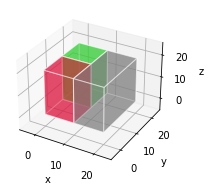

In [12]:
boxes,gt_pos = [[[10,10,20],[10,10,20],[10,20,20]]],[[[0,0,0],[0,10,0],[10,0,0]]]
boxes = boxes[0]
gt_pos = gt_pos[0]
ax = vis_box(boxes,gt_pos)

In [ ]:
box sort

In [128]:
box_x, box_y = 20,20

In [129]:
state = []
for i in range(box_x):
    state.append([])
    for j in range(box_y):
        state[i].append(0)
            
action_space = []
for i in range(box_x):
    for j in range(box_y):
        action_space.append([i,j])

In [130]:
state, action_space

([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [131]:
box = boxes[0]
box

array([20,  5,  6])

In [132]:
possible_x = [x for x in range(20-box[0] + 1)]
possible_y = [y for y in range(20-box[1] + 1)]

possible_x, possible_y

([0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [133]:
possible_action_space = [possible_x, possible_y]
possible_action_space

[[0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

In [134]:
act_x = np.random.randint(possible_action_space[0][-1] + 1)
act_y = np.random.randint(possible_action_space[1][-1] + 1)
z = 0
action = [act_x, act_y, z]
action

[0, 15, 0]

In [135]:
for i in range(action[0], action[0] + box[0]):
    for j in range(action[1], action[1] + box[1]):
            state[i][j] += box[2]
state

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6,

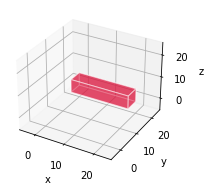

In [140]:
ax = vis_box([box],[action])

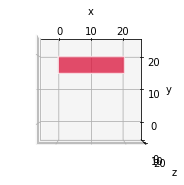

In [141]:
ax = vis_box([box],[action])
ax.view_init(90,-90)

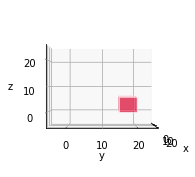

In [142]:
ax = vis_box([box],[action])
ax.view_init(0,0)

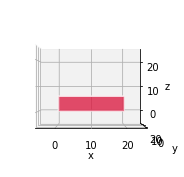

In [143]:
ax = vis_box([box],[action])
ax.view_init(0,-90)

In [144]:
box2 = boxes[4]
box2

array([ 4, 20,  7])

In [145]:
possible_x = [x for x in range(20-box2[0] + 1)]
possible_y = [y for y in range(20-box2[1] + 1)]

possible_x, possible_y

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0])

In [146]:
can_actions = [[x,y] for x in possible_x for y in possible_y]
can_actions

[[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [9, 0],
 [10, 0],
 [11, 0],
 [12, 0],
 [13, 0],
 [14, 0],
 [15, 0],
 [16, 0]]

In [160]:
z=7
action_list = []

for act in can_actions:
    for i in range(act[0], act[0] + box2[0]):
        for j in range(act[1], act[1] + box2[1]):
            print(act[0], act[1], box2[0], box2[1], i, j)
            #if state[i][j] <= z:
                #break
        #if j != act[1] + box2[1]:
            #break
            
    if i == act[0] + box2[0] - 1:
        action_list.append(act)
        
state, action_list

0 0 4 20 0 0
0 0 4 20 0 1
0 0 4 20 0 2
0 0 4 20 0 3
0 0 4 20 0 4
0 0 4 20 0 5
0 0 4 20 0 6
0 0 4 20 0 7
0 0 4 20 0 8
0 0 4 20 0 9
0 0 4 20 0 10
0 0 4 20 0 11
0 0 4 20 0 12
0 0 4 20 0 13
0 0 4 20 0 14
0 0 4 20 0 15
0 0 4 20 0 16
0 0 4 20 0 17
0 0 4 20 0 18
0 0 4 20 0 19
0 0 4 20 1 0
0 0 4 20 1 1
0 0 4 20 1 2
0 0 4 20 1 3
0 0 4 20 1 4
0 0 4 20 1 5
0 0 4 20 1 6
0 0 4 20 1 7
0 0 4 20 1 8
0 0 4 20 1 9
0 0 4 20 1 10
0 0 4 20 1 11
0 0 4 20 1 12
0 0 4 20 1 13
0 0 4 20 1 14
0 0 4 20 1 15
0 0 4 20 1 16
0 0 4 20 1 17
0 0 4 20 1 18
0 0 4 20 1 19
0 0 4 20 2 0
0 0 4 20 2 1
0 0 4 20 2 2
0 0 4 20 2 3
0 0 4 20 2 4
0 0 4 20 2 5
0 0 4 20 2 6
0 0 4 20 2 7
0 0 4 20 2 8
0 0 4 20 2 9
0 0 4 20 2 10
0 0 4 20 2 11
0 0 4 20 2 12
0 0 4 20 2 13
0 0 4 20 2 14
0 0 4 20 2 15
0 0 4 20 2 16
0 0 4 20 2 17
0 0 4 20 2 18
0 0 4 20 2 19
0 0 4 20 3 0
0 0 4 20 3 1
0 0 4 20 3 2
0 0 4 20 3 3
0 0 4 20 3 4
0 0 4 20 3 5
0 0 4 20 3 6
0 0 4 20 3 7
0 0 4 20 3 8
0 0 4 20 3 9
0 0 4 20 3 10
0 0 4 20 3 11
0 0 4 20 3 12
0 0 4 20 3 13
0 0 

9 0 4 20 9 18
9 0 4 20 9 19
9 0 4 20 10 0
9 0 4 20 10 1
9 0 4 20 10 2
9 0 4 20 10 3
9 0 4 20 10 4
9 0 4 20 10 5
9 0 4 20 10 6
9 0 4 20 10 7
9 0 4 20 10 8
9 0 4 20 10 9
9 0 4 20 10 10
9 0 4 20 10 11
9 0 4 20 10 12
9 0 4 20 10 13
9 0 4 20 10 14
9 0 4 20 10 15
9 0 4 20 10 16
9 0 4 20 10 17
9 0 4 20 10 18
9 0 4 20 10 19
9 0 4 20 11 0
9 0 4 20 11 1
9 0 4 20 11 2
9 0 4 20 11 3
9 0 4 20 11 4
9 0 4 20 11 5
9 0 4 20 11 6
9 0 4 20 11 7
9 0 4 20 11 8
9 0 4 20 11 9
9 0 4 20 11 10
9 0 4 20 11 11
9 0 4 20 11 12
9 0 4 20 11 13
9 0 4 20 11 14
9 0 4 20 11 15
9 0 4 20 11 16
9 0 4 20 11 17
9 0 4 20 11 18
9 0 4 20 11 19
9 0 4 20 12 0
9 0 4 20 12 1
9 0 4 20 12 2
9 0 4 20 12 3
9 0 4 20 12 4
9 0 4 20 12 5
9 0 4 20 12 6
9 0 4 20 12 7
9 0 4 20 12 8
9 0 4 20 12 9
9 0 4 20 12 10
9 0 4 20 12 11
9 0 4 20 12 12
9 0 4 20 12 13
9 0 4 20 12 14
9 0 4 20 12 15
9 0 4 20 12 16
9 0 4 20 12 17
9 0 4 20 12 18
9 0 4 20 12 19
10 0 4 20 10 0
10 0 4 20 10 1
10 0 4 20 10 2
10 0 4 20 10 3
10 0 4 20 10 4
10 0 4 20 10 5
10 0 4 20 10

([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
while True:
    act_x = np.random.randint(possible_action_space[0][-1] + 1)
    act_y = np.random.randint(possible_action_space[1][-1] + 1)
    action = [act_x, act_y, z]
    action
    
    if can_location():
        break
    else:
        z += 1

In [73]:
possibles = []

for i in range(len(possible_x)):
    for j in range(len(possible_y)):
        for k in range(len(possible_z)):
            possibles.append([i, j, k])
possibles

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 0, 3],
 [0, 0, 4],
 [0, 0, 5],
 [0, 0, 6],
 [0, 0, 7],
 [0, 0, 8],
 [0, 0, 9],
 [0, 0, 10],
 [0, 0, 11],
 [0, 0, 12],
 [0, 0, 13],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 0, 3],
 [1, 0, 4],
 [1, 0, 5],
 [1, 0, 6],
 [1, 0, 7],
 [1, 0, 8],
 [1, 0, 9],
 [1, 0, 10],
 [1, 0, 11],
 [1, 0, 12],
 [1, 0, 13],
 [2, 0, 0],
 [2, 0, 1],
 [2, 0, 2],
 [2, 0, 3],
 [2, 0, 4],
 [2, 0, 5],
 [2, 0, 6],
 [2, 0, 7],
 [2, 0, 8],
 [2, 0, 9],
 [2, 0, 10],
 [2, 0, 11],
 [2, 0, 12],
 [2, 0, 13],
 [3, 0, 0],
 [3, 0, 1],
 [3, 0, 2],
 [3, 0, 3],
 [3, 0, 4],
 [3, 0, 5],
 [3, 0, 6],
 [3, 0, 7],
 [3, 0, 8],
 [3, 0, 9],
 [3, 0, 10],
 [3, 0, 11],
 [3, 0, 12],
 [3, 0, 13],
 [4, 0, 0],
 [4, 0, 1],
 [4, 0, 2],
 [4, 0, 3],
 [4, 0, 4],
 [4, 0, 5],
 [4, 0, 6],
 [4, 0, 7],
 [4, 0, 8],
 [4, 0, 9],
 [4, 0, 10],
 [4, 0, 11],
 [4, 0, 12],
 [4, 0, 13],
 [5, 0, 0],
 [5, 0, 1],
 [5, 0, 2],
 [5, 0, 3],
 [5, 0, 4],
 [5, 0, 5],
 [5, 0, 6],
 [5, 0, 7],
 [5, 0, 8],
 [5, 0, 9],
 [5, 0, 10],
 [5, 0,

In [74]:
mask_list = []
for i in range(box_x):
    for j in range(box_y):
        for k in range(box_z):
            if state[i][j][k] == 1:
                mask_list.append([i,j,k])
mask_list

[[0, 8, 8],
 [0, 8, 9],
 [0, 8, 10],
 [0, 8, 11],
 [0, 8, 12],
 [0, 8, 13],
 [0, 9, 8],
 [0, 9, 9],
 [0, 9, 10],
 [0, 9, 11],
 [0, 9, 12],
 [0, 9, 13],
 [0, 10, 8],
 [0, 10, 9],
 [0, 10, 10],
 [0, 10, 11],
 [0, 10, 12],
 [0, 10, 13],
 [0, 11, 8],
 [0, 11, 9],
 [0, 11, 10],
 [0, 11, 11],
 [0, 11, 12],
 [0, 11, 13],
 [0, 12, 8],
 [0, 12, 9],
 [0, 12, 10],
 [0, 12, 11],
 [0, 12, 12],
 [0, 12, 13],
 [1, 8, 8],
 [1, 8, 9],
 [1, 8, 10],
 [1, 8, 11],
 [1, 8, 12],
 [1, 8, 13],
 [1, 9, 8],
 [1, 9, 9],
 [1, 9, 10],
 [1, 9, 11],
 [1, 9, 12],
 [1, 9, 13],
 [1, 10, 8],
 [1, 10, 9],
 [1, 10, 10],
 [1, 10, 11],
 [1, 10, 12],
 [1, 10, 13],
 [1, 11, 8],
 [1, 11, 9],
 [1, 11, 10],
 [1, 11, 11],
 [1, 11, 12],
 [1, 11, 13],
 [1, 12, 8],
 [1, 12, 9],
 [1, 12, 10],
 [1, 12, 11],
 [1, 12, 12],
 [1, 12, 13],
 [2, 8, 8],
 [2, 8, 9],
 [2, 8, 10],
 [2, 8, 11],
 [2, 8, 12],
 [2, 8, 13],
 [2, 9, 8],
 [2, 9, 9],
 [2, 9, 10],
 [2, 9, 11],
 [2, 9, 12],
 [2, 9, 13],
 [2, 10, 8],
 [2, 10, 9],
 [2, 10, 10],
 [2, 10, 11]

In [77]:
len(mask_list), len(possibles)

(600, 238)

In [79]:
for mask in mask_list:
    if mask in possibles:
        possibles.remove(mask)
possibles

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 0, 3],
 [0, 0, 4],
 [0, 0, 5],
 [0, 0, 6],
 [0, 0, 7],
 [0, 0, 8],
 [0, 0, 9],
 [0, 0, 10],
 [0, 0, 11],
 [0, 0, 12],
 [0, 0, 13],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 0, 3],
 [1, 0, 4],
 [1, 0, 5],
 [1, 0, 6],
 [1, 0, 7],
 [1, 0, 8],
 [1, 0, 9],
 [1, 0, 10],
 [1, 0, 11],
 [1, 0, 12],
 [1, 0, 13],
 [2, 0, 0],
 [2, 0, 1],
 [2, 0, 2],
 [2, 0, 3],
 [2, 0, 4],
 [2, 0, 5],
 [2, 0, 6],
 [2, 0, 7],
 [2, 0, 8],
 [2, 0, 9],
 [2, 0, 10],
 [2, 0, 11],
 [2, 0, 12],
 [2, 0, 13],
 [3, 0, 0],
 [3, 0, 1],
 [3, 0, 2],
 [3, 0, 3],
 [3, 0, 4],
 [3, 0, 5],
 [3, 0, 6],
 [3, 0, 7],
 [3, 0, 8],
 [3, 0, 9],
 [3, 0, 10],
 [3, 0, 11],
 [3, 0, 12],
 [3, 0, 13],
 [4, 0, 0],
 [4, 0, 1],
 [4, 0, 2],
 [4, 0, 3],
 [4, 0, 4],
 [4, 0, 5],
 [4, 0, 6],
 [4, 0, 7],
 [4, 0, 8],
 [4, 0, 9],
 [4, 0, 10],
 [4, 0, 11],
 [4, 0, 12],
 [4, 0, 13],
 [5, 0, 0],
 [5, 0, 1],
 [5, 0, 2],
 [5, 0, 3],
 [5, 0, 4],
 [5, 0, 5],
 [5, 0, 6],
 [5, 0, 7],
 [5, 0, 8],
 [5, 0, 9],
 [5, 0, 10],
 [5, 0,

In [80]:
len(possibles)

238

In [69]:
possible_action_space = [possible_x, possible_y, possible_z]
possible_action_space

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [0],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

In [70]:
act_x = np.random.randint(possible_action_space[0][-1] + 1)
act_y = np.random.randint(possible_action_space[1][-1] + 1)
act_z = np.random.randint(possible_action_space[2][-1] + 1)
action2 = [act_x, act_y, act_z]
action2

[15, 0, 2]

In [87]:
for i in range(action2[0], action2[0] + box2[0]):
    for j in range(action2[1], action2[1] + box2[1]):
        for k in range(action2[2], action2[2] + box2[2]):
            if state[i][j][k] == 1:
                print(i,j,k)
            else:
                state[i][j][k] = 1
state

15 8 8
15 9 8
15 10 8
15 11 8
15 12 8
16 8 8
16 9 8
16 10 8
16 11 8
16 12 8
17 8 8
17 9 8
17 10 8
17 11 8
17 12 8
18 8 8
18 9 8
18 10 8
18 11 8
18 12 8


[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

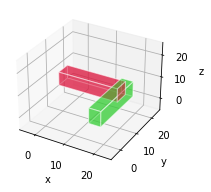

In [71]:
ax = vis_box([box, box2],[action, action2])

In [83]:
box, action

(array([20,  5,  6]), [0, 8, 8])

In [84]:
box2, action2

(array([ 4, 20,  7]), [15, 0, 2])

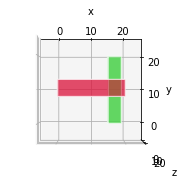

In [82]:
ax = vis_box([box, box2],[action, action2])
ax.view_init(90,-90)

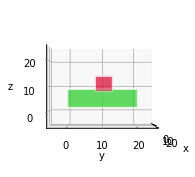

In [85]:
ax = vis_box([box, box2],[action, action2])
ax.view_init(0,0)

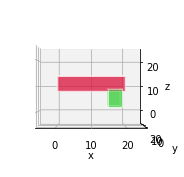

In [86]:
ax = vis_box([box, box2],[action, action2])
ax.view_init(0,-90)